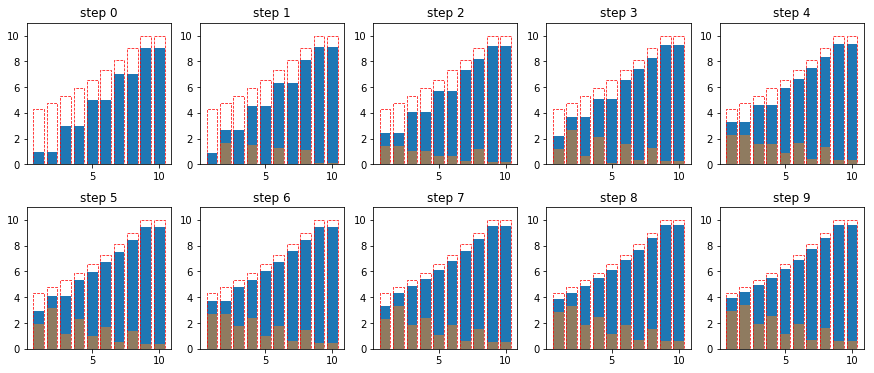

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

phi = np.array([[1], [1], [3], [3], [5], [5], [7], [7], [9], [9]])

# prefetched optimal state value function obtained from value iteration
v_opt = np.array([[ 4.3046721], [ 4.782969 ], [ 5.31441  ], [ 5.9049   ], [ 6.561    ],
    [ 7.29     ], [ 8.1      ], [ 9.       ], [10.       ], [10.       ]])

# number of grids
n = 10

# transition probability of action moving left
# it is a deterministic dynamics
P1 = np.identity(n)[:-1]
P1 = np.concatenate([[P1[0]], P1])

# transition probability of action moving right
P2 = np.identity(n)[1:]
P2 = np.concatenate([P2, [P2[-1]]])

# initial state values
# you can try different initializations 
# - it is proved that initialization is equavalent to potential reward shaping
v = np.zeros((n, 1))

# original reward function
r = np.zeros((n, 1))
r[-1] = 1
r_=r+[]

# discount rate
gamma = 0.9

# original Bellman operator
Bellman_op = lambda v: np.maximum(np.matmul(P1, r) + gamma * np.matmul(P1, v), 
                                  np.matmul(P2, r) + gamma * np.matmul(P2, v)) 
# reward shaped Bellman operator
Bellman_op_rs = lambda v: np.maximum(np.matmul(P1, r) + gamma*np.matmul(P1, phi) - phi + gamma * np.matmul(P1, v), 
                                  np.matmul(P2, r) + gamma*np.matmul(P2, phi) - phi+ gamma * np.matmul(P2, v)) 

# value iteration and plot
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.bar(np.arange(n) + 1, (v + phi).flatten())
    plt.bar(np.arange(n) + 1, v.flatten(), alpha=0.5)
    plt.bar(np.arange(n) + 1, v_opt.flatten(), edgecolor='r', 
            color='None', linewidth=0.75, linestyle='--')
    plt.ylim([0, 11])
    plt.title('step {}'.format(i))
    v = Bellman_op_rs(v)
plt.subplots_adjust(hspace = 0.3)


